# Quick Save-Load Test 2

**Objectives:**
  - Test whether a model can be saved
  - Test whether a model's parameters can be successfully reloaded into another instance
  - Test whether a model's architecture can be reloaded
  - Test whether a model's training can be preserved
  - Test whether a model's training be continued
  - Test whether a model's history is preserved

**TODO** - Automate test

In [3]:
from google.colab import files

import mnist_example as mnist_ex
import gan
from importlib import reload
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.keras.backend import clear_session
from tensorflow.keras.datasets import mnist

import tensorflow as tf

import pickle

In [4]:
(real_train, _), (real_test, _) = mnist.load_data()
real_train = (np.expand_dims(real_train, axis=-1)/127.5 - 1.).astype("float32")
real_test = (np.expand_dims(real_test, axis=-1)/127.5 - 1.).astype("float32")
real_train.shape

(60000, 28, 28, 1)

In [5]:
reload(gan)

<module 'gan' from '/content/gan.py'>

In [8]:
clear_session()
model = gan.GAN(x_shape=real_train.shape[1:], kernal_size=5, verbose=True, lr=(1e-4, 2e-4))

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 12544)             1266944   
_________________________________________________________________
batch_normalization (BatchNo (None, 12544)             50176     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 12544)             0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 7, 7, 128)         819200    
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 128)         51

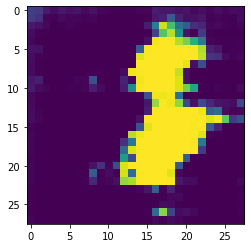

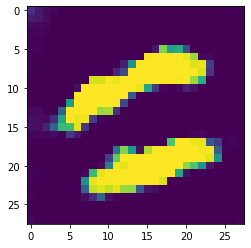

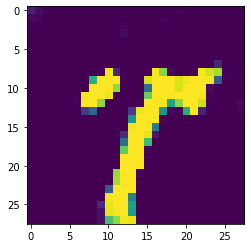

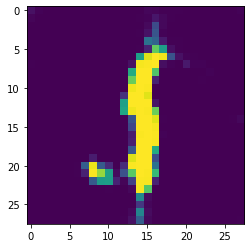

In [9]:
model.train(real_train, num_epochs=4, batch_size=60, labels=(0, 0.9))

In [10]:
model.save("my_model.p", model_dir="model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model/combined/assets
INFO:tensorflow:Assets written to: model/generator/assets
INFO:tensorflow:Assets written to: model/discriminator/assets


In [21]:
reload(gan)

<module 'gan' from '/content/gan.py'>

In [12]:
model2 = gan.GAN.load("my_model.p", model_dir="model")

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 12544)             1266944   
_________________________________________________________________
batch_normalization (BatchNo (None, 12544)             50176     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 12544)             0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 7, 7, 128)         819200    
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 128)         51

Note - Model architecture was successfully restored.

In [13]:
model2.__dict__

{'combined': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f72a8742898>,
 'disc_lr': 0.0002,
 'discriminator': <tensorflow.python.keras.engine.functional.Functional at 0x7f72ae93d160>,
 'gen_lr': 0.0001,
 'generator': <tensorflow.python.keras.engine.functional.Functional at 0x7f72a8cb9668>,
 'history': <history.History at 0x7f72a8cb9860>,
 'kernal_size': 5,
 'latent_dims': 100,
 'min_filters': 64,
 'num_blocks': 2,
 'strides': 2,
 'x_shape': (28, 28, 1)}

In [14]:
model.__dict__

{'combined': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f72ab1fc358>,
 'disc_lr': 0.0002,
 'discriminator': <tensorflow.python.keras.engine.functional.Functional at 0x7f72ab41bc88>,
 'gen_lr': 0.0001,
 'generator': <tensorflow.python.keras.engine.functional.Functional at 0x7f72ab1f3c88>,
 'history': <history.History at 0x7f72ab1fc9b0>,
 'kernal_size': 5,
 'latent_dims': 100,
 'min_filters': 64,
 'num_blocks': 2,
 'strides': 2,
 'x_shape': (28, 28, 1)}

Note - Model parameters were successfully restored.

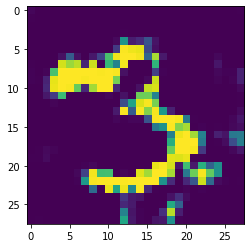

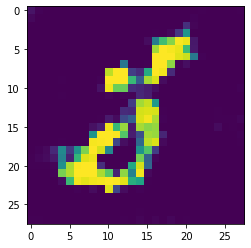

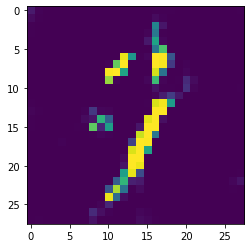

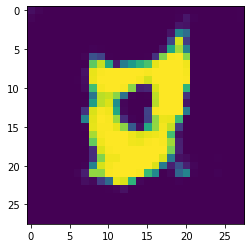

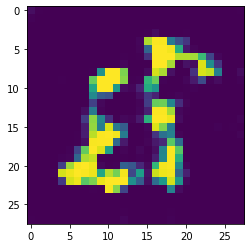

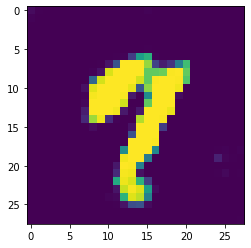

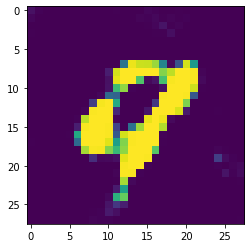

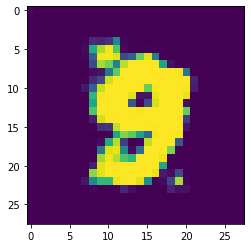

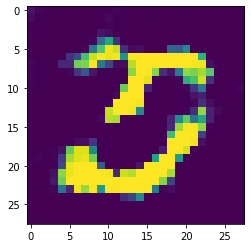

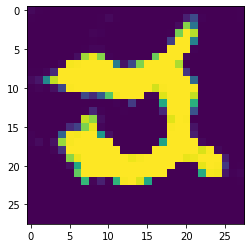

In [25]:
for _ in range(10):
  model2.generate_img()

It is clear that the trained weight were persisted through the save-load process.

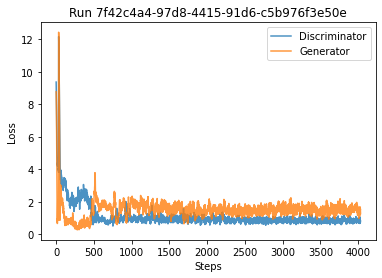

In [26]:
model2.history.plot_loss()

In [29]:
assert model.history.disc_loss == model2.history.disc_loss
assert model.history.gen_loss == model2.history.gen_loss

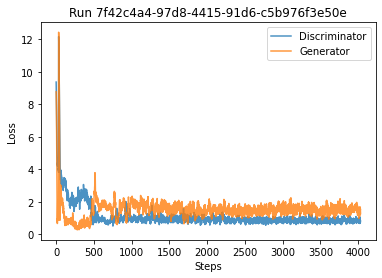

In [30]:
model.history.plot_loss()

It is clear that model history was also preserved.